## Support Vector Machine


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


### Downsampling the dataframe

In [2]:
data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')

## Splitting of data

In [3]:
X = data.iloc[:,3:]
y = data['TARGET']
print(X.shape, y.shape)

(336226, 28) (336226,)


### Using One-hot Encoding

### Training and Test Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

### Scaling
Here we are going to use scaling of the dataset for better prediction. Scaling normalizes the data to prroduce mean as 1 and standard deviation as 0. This helps the model to execute faster and more efficiently.

In [5]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Model

In [6]:
classifier_svm = SVC(kernel = 'rbf', random_state = 13, verbose = True)
classifier_svm.fit(X_train_scaled, y_train)

## Confusion Matrix

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


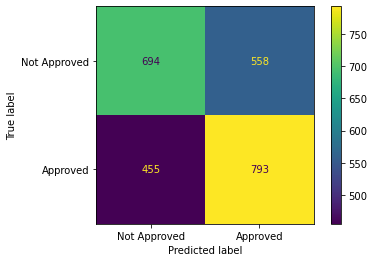

In [ ]:
plot_confusion_matrix(classifier_svm, X_test_scaled, y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In the confusion matrix we see that 1252 people that did not approved 694 were correclty classified. And of the 1248 people that approved 793 were correctly classified. This is not a really good score so we are going to do some automated hyperparameter optimization using GridSearchCV.

## Using GridSearchCV for Cross Validation

In [ ]:
param_grid = {'C': [0.5, 1, 10 ,100, 1000],
              'gamma': ['scale', 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly'],
              'degree': [3,4,5,6,7,8]}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy')

optimal_params.fit(X_train_scaled, y_train)

In [ ]:
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid'}


In [ ]:
print(optimal_params.best_score_)

0.6069333333333333


/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


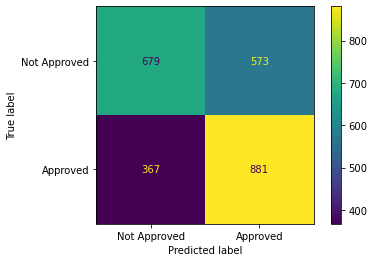

In [ ]:
plot_confusion_matrix(optimal_params, X_test_scaled, y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In [ ]:
#prediction
y_pred = optimal_params.predict(X_test)
report = classification_report(y_pred,y_test)
print(report)

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.50      0.67      2499
           1       0.00      0.00      0.00         1

    accuracy                           0.50      2500
   macro avg       0.50      0.25      0.33      2500
weighted avg       1.00      0.50      0.67      2500

